In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

100%|█████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1891.02it/s]


saved 0 frames


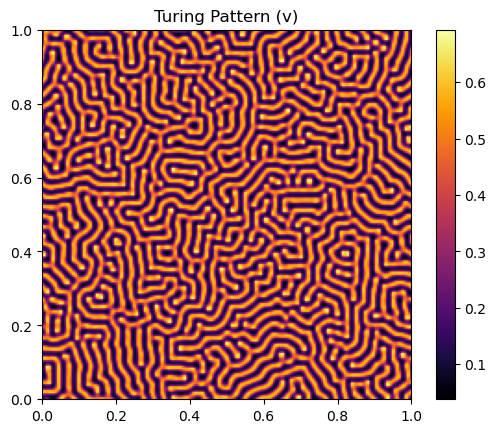

In [3]:
n = 200  # Grid size (n x n)

# Dynamic Parameters
Du = 0.21  # Diffusion rate of u
Dv = 0.04  # Diffusion rate of v
F = 0.09  # Feed rate
k = 0.06  # Kill rate

# Dynamic Parameters
#Du = 0.01  # Diffusion rate of u
#Dv = 0.005  # Diffusion rate of v
#F = 0.025  # Feed rate
#k = 0.06  # Kill rate

m = 10
j = 1

# Initialize u and v arrays with random noise
u = np.random.rand(n, n)
v = np.random.rand(n, n)

# Define the laplacian operator on an axis
def laplacian(mtx, axis=0):
    return (np.roll(mtx, 1, axis=axis) + np.roll(mtx, -1, axis=axis) - 2*mtx) / 1.0

# Simulation
for i in tqdm(range(2000)):
    u_lap = laplacian(u, axis=0) + laplacian(u, axis=1)
    v_lap = laplacian(v, axis=0) + laplacian(v, axis=1)
    
    # Reaction-diffusion equations
    dudt = Du*u_lap - u*v*v + F*(1 - u)
    dvdt = Dv*v_lap + u*v*v - (F + k)*v

    # Update u and v using Euler's method
    u += dudt
    v += dvdt

    # Plot intermediate frames
    if False and i%m==0:
        fig, ax = plt.subplots()
        pos = ax.imshow(v, cmap='inferno', extent=[0, 1, 0, 1])
        #fig.colorbar(pos, ax=ax)
        ax.set_title('Turing Pattern (v)')
        j+=1
        plt.savefig(f"frames/turing_frame{j}.png")
        plt.close()

print(f"saved {j-1} frames")

# Plot the final pattern
#fig, ax = plt.subplots()
#pos = ax.imshow(v, cmap='inferno', extent=[0, 1, 0, 1])
#fig.colorbar(pos, ax=ax)
#ax.set_title('Turing Pattern (v)')
#plt.show()

# Plot the final pattern
fig, ax = plt.subplots()
pos = ax.imshow(v, cmap='inferno', extent=[0, 1, 0, 1])
fig.colorbar(pos, ax=ax)
ax.set_title('Turing Pattern (v)')
plt.show()


(200, 200) (200, 200)


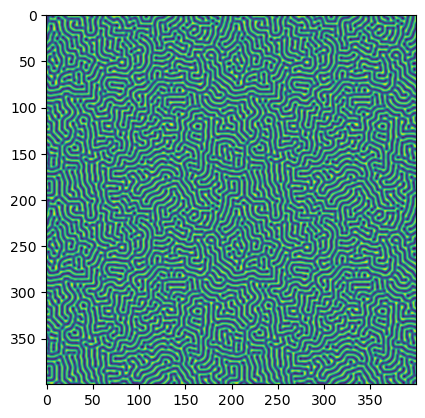

In [19]:
print(v.shape, u.shape)
G = np.append(u, u, axis=1)
G=np.append(G,G, axis=0)
G.shape
plt.imshow(G)